# BayesianGaussianMixtureの動作検証


In [0]:
%matplotlib inline

検証用のデータを作成

- $(x, y) = (0, 0)$ と $(x, y) = (10, 10)$ あたりの乱数を作成
- 理想は2クラスに分類されるだろう


<function matplotlib.pyplot.show>

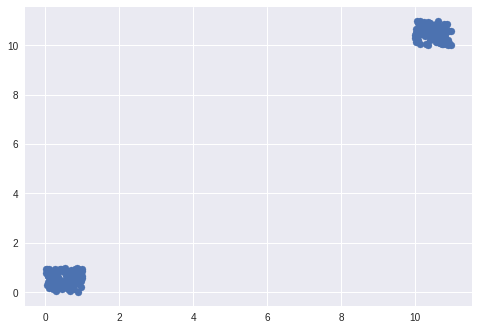

In [18]:
from numpy.random import rand
vec_list = []
for base in [[10, 10], [0, 0]]:
  for _ in range(100):
    temp = [base[0] + rand(), base[1] + rand()]
    vec_list.append(temp)

import matplotlib.pyplot as plt
x = []
y = []
for vec in vec_list:
  x += [vec[0]]
  y += [vec[1]]
plt.scatter(x, y)
plt.show

BGMMの学習
- 最大クラスター数10に設定してBGMMを学習する
- オプションで学習回数と掲載経過の表示を変更している



In [14]:
import numpy as np
nvec = np.array(vec_list)

from sklearn.mixture import BayesianGaussianMixture
gmm = BayesianGaussianMixture(n_components=10, verbose=1, max_iter=1000)
gmm.fit(nvec)

Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=1000, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=1, random_state=None, reg_covar=1e-06,
            tol=0.001, verbose=1, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

学習結果
- クラスター番号2, 5の2クラスターが選択された
- 最大10個のクラスター数を設定したが，これの例では2個に収束した

clusters: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
clusters_set: {2, 5}
len(clusters_set): 2


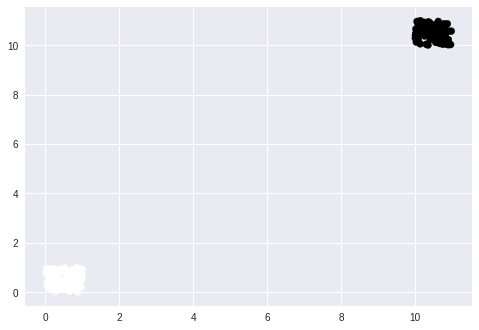

In [19]:
clusters = gmm.predict(nvec)
print("clusters:", clusters)

clusters_set = set(clusters)
print("clusters_set:", clusters_set)
print("len(clusters_set):", len(clusters_set))

plt.scatter(x, y, c=clusters)

候補クラスターの重み

- クラスター番号の2と5のみに確率が集まる
- 選ばれなかったクラスター番号は0に近かった


weights: [5.02264606e-03 4.99741071e-03 4.97157256e-01 4.92261843e-03
 4.87343173e-03 4.82548803e-01 4.34424478e-04 3.94931178e-05
 3.59028343e-06 3.26389403e-07]


<function matplotlib.pyplot.show>

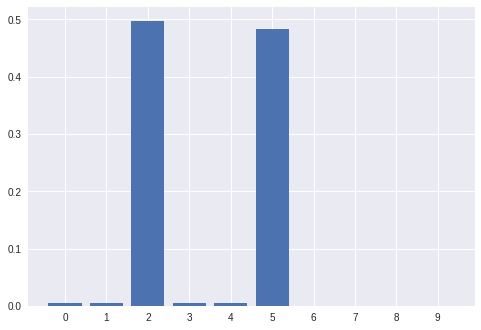

In [17]:
weights = gmm.weights_
print("weights:", weights)

components = gmm.n_components
x_clusters = np.arange(components)
plt.bar(x_clusters, weights, tick_label=x_clusters)
plt.show

BGMMでクラスター数を決定するには，割り振られたクラスター番号の数を調べる

```
clusters = gmm.predict(nvec)
clusters_set = set(clusters)
print("len(clusters_set):", len(clusters_set))
```

 複雑なデータは上記のように綺麗に分かれないので，クラスター番号の重みを閾値またはグラフ化して判定する




